In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Read the CSV files
transaction_data = pd.read_csv('QVI_transaction_data.csv')
customer_data = pd.read_csv('QVI_purchase_behaviour.csv')
print(transaction_data['DATE'].head())

0    17-10-2018
1    14-05-2019
2    20-05-2019
3    17-08-2018
4    18-08-2018
Name: DATE, dtype: object


### Data Exploration

In [42]:
# Display the first few rows of each dataset
print("Transaction Data Sample:")
print(transaction_data.head())
print("\nTransaction Data Info:")
print(transaction_data.info())
print("\nTransaction Data Description:")
print(transaction_data.describe())

print("\nCustomer Data Sample:")
print(customer_data.head())
print("\nCustomer Data Info:")
print(customer_data.info())
print("\nCustomer Data Description:")
print(customer_data.describe(include='all'))

Transaction Data Sample:
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  17-10-2018          1            1000       1         5   
1  14-05-2019          1            1307     348        66   
2  20-05-2019          1            1343     383        61   
3  17-08-2018          2            2373     974        69   
4  18-08-2018          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  

Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------         

In [43]:
# Check for duplicates
print("\nDuplicate transactions:", transaction_data.duplicated().sum())
print("Duplicate customers:", customer_data.duplicated().sum())


Duplicate transactions: 1
Duplicate customers: 0


In [44]:
# Check for missing values
print("\nMissing values in transaction data:")
print(transaction_data.isnull().sum())
print("\nMissing values in customer data:")
print(customer_data.isnull().sum())


Missing values in transaction data:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Missing values in customer data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [45]:
# Look at unique values in categorical columns
print("\nUnique stores:", transaction_data['STORE_NBR'].nunique())
print("Unique products:", transaction_data['PROD_NBR'].nunique())
print("Unique loyalty cards in transactions:",
transaction_data['LYLTY_CARD_NBR'].nunique())
print("Unique loyalty cards in customer data:",
customer_data['LYLTY_CARD_NBR'].nunique())


Unique stores: 272
Unique products: 114
Unique loyalty cards in transactions: 72637
Unique loyalty cards in customer data: 72637


### Data Cleaning and Prepration

In [47]:
# Data Cleaning for Transaction Data
print("Before cleaning - Transaction data shape:", transaction_data.shape)

Before cleaning - Transaction data shape: (264836, 8)


In [48]:
# Check for duplicate transactions
duplicates = transaction_data.duplicated().sum()
if duplicates > 0:
    transaction_data = transaction_data.drop_duplicates()
print(f"Removed {duplicates} duplicate transactions")

Removed 1 duplicate transactions


In [50]:
# Check for outliers in quantity and sales
q_low_qty = transaction_data['PROD_QTY'].quantile(0.01)
q_high_qty = transaction_data['PROD_QTY'].quantile(0.99)
q_low_sales = transaction_data['TOT_SALES'].quantile(0.01)
q_high_sales = transaction_data['TOT_SALES'].quantile(0.99)

outliers_qty = transaction_data[(transaction_data['PROD_QTY'] < q_low_qty) |
(transaction_data['PROD_QTY'] > q_high_qty)]
outliers_sales = transaction_data[(transaction_data['TOT_SALES'] < q_low_sales) |
(transaction_data['TOT_SALES'] > q_high_sales)]

print(f"Quantity outliers: {len(outliers_qty)}")
print(f"Sales outliers: {len(outliers_sales)}")


Quantity outliers: 1279
Sales outliers: 2952


In [55]:
# Check for inconsistencies in PROD_NAME (chips product verification)
# Extract chip brand information
transaction_data['CHIP_BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]
print("\nUnique chip brands:", transaction_data['CHIP_BRAND'].unique())

# Standardize product names (remove extra spaces)
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.strip()

# Extract package size into a separate column
transaction_data['PACKAGE_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+g)')
print("\nPackage sizes:\n", transaction_data['PACKAGE_SIZE'].value_counts())


Unique chip brands: ['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'Woolworths' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Snbts' 'Sunbites']

Package sizes:
 175g    64928
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
135g     3257
250g     3169
210g     3167
90g      3008
190g     2995
160g     2970
220g     1564
70g      1507
180g     1468
125g     1454
Name: PACKAGE_SIZE, dtype: int64


In [56]:
# Data Cleaning for Customer Data
print("\nBefore cleaning - Customer data shape:", customer_data.shape)


Before cleaning - Customer data shape: (72637, 3)


In [58]:
# Check for duplicate loyalty card numbers
duplicates = customer_data.duplicated(subset=['LYLTY_CARD_NBR']).sum()
if duplicates > 0:
    customer_data = customer_data.drop_duplicates(subset=['LYLTY_CARD_NBR'])
print(f"Removed {duplicates} duplicate customer records")


Removed 0 duplicate customer records


In [61]:
# Ensure LIFESTAGE and PREMIUM_CUSTOMER are categorical
customer_data['LIFESTAGE'] = customer_data['LIFESTAGE'].astype('category')
customer_data['PREMIUM_CUSTOMER'] = customer_data['PREMIUM_CUSTOMER'].astype('category')

print("\nLifestage categories:\n", customer_data['LIFESTAGE'].value_counts())
print("\nPremium customer categories:\n",
customer_data['PREMIUM_CUSTOMER'].value_counts())



Lifestage categories:
 RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

Premium customer categories:
 Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


In [64]:
# Merge datasets on LYLTY_CARD_NBR
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

In [66]:
# Check for transactions without customer data
missing_customer_info = merged_data[merged_data['LIFESTAGE'].isna()].shape[0]
print(f"\nTransactions without customer data: {missing_customer_info} "
      f"({missing_customer_info / len(merged_data) * 100:.2f}%)")



Transactions without customer data: 0 (0.00%)


In [67]:
# After data cleaning - summary of merged data
print("\nAfter cleaning and merging - Final data shape:", merged_data.shape)
print("\nFinal merged data sample:")
print(merged_data.head())


After cleaning and merging - Final data shape: (264835, 12)

Final merged data sample:
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  17-10-2018          1            1000       1         5   
1  14-05-2019          1            1307     348        66   
2  20-05-2019          1            1343     383        61   
3  17-08-2018          2            2373     974        69   
4  18-08-2018          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES CHIP_BRAND  \
0    Natural Chip        Compny SeaSalt175g         2        6.0    Natural   
1                  CCs Nacho Cheese    175g         3        6.3        CCs   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9     Smiths   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0     Smiths   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8     Kettle   

  PACKAGE_SIZE               LIFESTAGE PREMIUM_CUSTOMER  
0     

In [68]:
# Calculate unit price
merged_data['UNIT_PRICE'] = merged_data['TOT_SALES'] / merged_data['PROD_QTY']

In [70]:
# Display summary statistics of the cleaned data
print("\nCleaned data summary statistics:")
print(merged_data.describe())


Cleaned data summary statistics:
           STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count  264835.000000    2.648350e+05  2.648350e+05  264835.000000   
mean      135.080216    1.355496e+05  1.351584e+05      56.583201   
std        76.784306    8.058011e+04  7.813316e+04      32.826692   
min         1.000000    1.000000e+03  1.000000e+00       1.000000   
25%        70.000000    7.002100e+04  6.760100e+04      28.000000   
50%       130.000000    1.303580e+05  1.351380e+05      56.000000   
75%       203.000000    2.030945e+05  2.027015e+05      85.000000   
max       272.000000    2.373711e+06  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES     UNIT_PRICE  
count  264835.000000  264835.000000  264835.000000  
mean        1.907308       7.304205       3.824628  
std         0.643655       3.083231       1.109524  
min         1.000000       1.500000       1.320000  
25%         2.000000       5.400000       3.000000  
50%         2.000000      

### Customer Segmentation Analysis

In [74]:
# Clean and standardize product names
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.strip()

In [76]:
# Extract package size
transaction_data['PACKAGE_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+g)')
transaction_data['PACKAGE_SIZE_GRAMS'] = transaction_data['PACKAGE_SIZE'].str.replace('g', '').astype(float)

In [78]:
# Calculate unit price
transaction_data['UNIT_PRICE'] = transaction_data['TOT_SALES'] / transaction_data['PROD_QTY']

In [79]:
# Merge datasets
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

In [81]:
# Customer Segmentation Analysis
print("Customer Segmentation Analysis")
print("------------------------------")

Customer Segmentation Analysis
------------------------------


In [84]:
# 1. Sales by LIFESTAGE
lifestage_sales = merged_data.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()
print("\n1. Total Sales by Lifestage:")
print(lifestage_sales)


1. Total Sales by Lifestage:
                LIFESTAGE  TOT_SALES
0   OLDER SINGLES/COUPLES  402420.75
1                RETIREES  366470.90
2          OLDER FAMILIES  353767.20
3          YOUNG FAMILIES  316160.10
4   YOUNG SINGLES/COUPLES  260405.30
5  MIDAGE SINGLES/COUPLES  184751.30
6            NEW FAMILIES   50433.45


In [86]:
# 2. Sales by PREMIUM_CUSTOMER
premium_sales = merged_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()
print("\n2. Total Sales by Premium Customer Segment:")
print(premium_sales)


2. Total Sales by Premium Customer Segment:
  PREMIUM_CUSTOMER  TOT_SALES
0       Mainstream  750744.50
1           Budget  676211.55
2          Premium  507452.95


In [87]:
# 3. Combined Segmentation (LIFESTAGE x PREMIUM_CUSTOMER)
segment_sales = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False).reset_index()
print("\n3. Total Sales by Combined Segment (Top 5):")
print(segment_sales.head())


3. Total Sales by Combined Segment (Top 5):
               LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0         OLDER FAMILIES           Budget  168363.25
1  YOUNG SINGLES/COUPLES       Mainstream  157621.60
2               RETIREES       Mainstream  155677.05
3         YOUNG FAMILIES           Budget  139345.85
4  OLDER SINGLES/COUPLES           Budget  136769.80


In [88]:
# 4. Average unit price by segment
segment_price = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['UNIT_PRICE'].mean().sort_values(ascending=False).reset_index()
print("\n4. Average Unit Price by Segment (Top 5):")
print(segment_price.head())


4. Average Unit Price by Segment (Top 5):
                LIFESTAGE PREMIUM_CUSTOMER  UNIT_PRICE
0   YOUNG SINGLES/COUPLES       Mainstream    4.071485
1  MIDAGE SINGLES/COUPLES       Mainstream    4.000101
2                RETIREES           Budget    3.924883
3                RETIREES          Premium    3.921323
4            NEW FAMILIES           Budget    3.919251


In [90]:
# 5. Package size preference by segment
segment_size = merged_data.groupby(['LIFESTAGE',
'PREMIUM_CUSTOMER'])['PACKAGE_SIZE_GRAMS'].mean().sort_values(ascending=False).reset_index()
print("\n5. Average Package Size (grams) by Segment (Top 5):")
print(segment_size.head())


5. Average Package Size (grams) by Segment (Top 5):
                LIFESTAGE PREMIUM_CUSTOMER  PACKAGE_SIZE_GRAMS
0   YOUNG SINGLES/COUPLES       Mainstream          184.669913
1  MIDAGE SINGLES/COUPLES       Mainstream          184.496163
2   OLDER SINGLES/COUPLES          Premium          183.097370
3                RETIREES          Premium          182.846634
4                RETIREES           Budget          182.845812


In [92]:
# 6. Purchase frequency by segment
segment_frequency = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TXN_ID'].nunique().sort_values(ascending=False).reset_index()
segment_frequency.rename(columns={'TXN_ID': 'TRANSACTION_COUNT'}, inplace=True)
print("\n6. Transaction Count by Segment (Top 5):")
print(segment_frequency.head())


6. Transaction Count by Segment (Top 5):
               LIFESTAGE PREMIUM_CUSTOMER  TRANSACTION_COUNT
0         OLDER FAMILIES           Budget              22935
1               RETIREES       Mainstream              21363
2  YOUNG SINGLES/COUPLES       Mainstream              20783
3         YOUNG FAMILIES           Budget              18970
4  OLDER SINGLES/COUPLES           Budget              18301


In [95]:
merged_data['TXN_SEGMENT'] = merged_data['LIFESTAGE'].astype(str) + "_" + merged_data['PREMIUM_CUSTOMER'].astype(str)
txn_qty = merged_data.groupby(['TXN_ID','TXN_SEGMENT'])['PROD_QTY'].sum().reset_index()
avg_qty = txn_qty.groupby('TXN_SEGMENT')['PROD_QTY'].mean().sort_values(ascending=False).reset_index()

print("\n7. Average Quantity per Transaction by Segment (Top 5):")
print(avg_qty.head())



7. Average Quantity per Transaction by Segment (Top 5):
                 TXN_SEGMENT  PROD_QTY
0     OLDER FAMILIES_Premium  2.001354
1  OLDER FAMILIES_Mainstream  1.966697
2      OLDER FAMILIES_Budget  1.964901
3      YOUNG FAMILIES_Budget  1.956299
4  YOUNG FAMILIES_Mainstream  1.955340


In [96]:
# 8. Brand preference by segment
brand_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER','PROD_NAME'])['TOT_SALES'].sum().reset_index()
brand_segment = brand_segment.sort_values(['LIFESTAGE', 'PREMIUM_CUSTOMER','TOT_SALES'], ascending=[True, True, False])
print("\n8. Top Brand by Segment (Sample):")
top_brands = brand_segment.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).head(1)
print(top_brands[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_NAME','TOT_SALES']].head())



8. Top Brand by Segment (Sample):
                  LIFESTAGE PREMIUM_CUSTOMER  \
11   MIDAGE SINGLES/COUPLES           Budget   
191  MIDAGE SINGLES/COUPLES       Mainstream   
239  MIDAGE SINGLES/COUPLES          Premium   
374            NEW FAMILIES           Budget   
467            NEW FAMILIES       Mainstream   

                                    PROD_NAME  TOT_SALES  
11           Dorito Corn Chp     Supreme 380g     734.50  
191  Smiths Crinkle Chips Salt & Vinegar 330g    2103.30  
239          Dorito Corn Chp     Supreme 380g    1212.25  
374          Kettle Honey Soy    Chicken 175g     513.00  
467          Dorito Corn Chp     Supreme 380g     422.50  


In [97]:
# 9. Sales contribution percentage by segment
total_sales = merged_data['TOT_SALES'].sum()
segment_contribution = segment_sales.copy()
segment_contribution['SALES_PERCENTAGE'] = (segment_contribution['TOT_SALES'] / total_sales * 100).round(2)
print("\n9. Sales Contribution Percentage by Segment (Top 5):")
print(segment_contribution[['LIFESTAGE', 'PREMIUM_CUSTOMER','SALES_PERCENTAGE']].head())


9. Sales Contribution Percentage by Segment (Top 5):
               LIFESTAGE PREMIUM_CUSTOMER  SALES_PERCENTAGE
0         OLDER FAMILIES           Budget              8.70
1  YOUNG SINGLES/COUPLES       Mainstream              8.15
2               RETIREES       Mainstream              8.05
3         YOUNG FAMILIES           Budget              7.20
4  OLDER SINGLES/COUPLES           Budget              7.07


In [98]:
# Create visualizations for the report
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

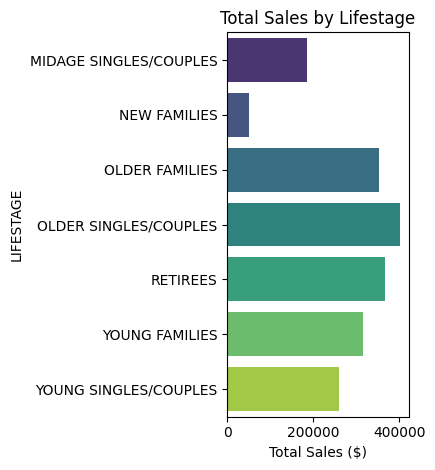

In [99]:
# Plot 1: Sales by Lifestage
plt.subplot(1, 2, 1)
sns.barplot(x='TOT_SALES', y='LIFESTAGE', data=lifestage_sales, palette='viridis')
plt.title('Total Sales by Lifestage')
plt.xlabel('Total Sales ($)')
plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

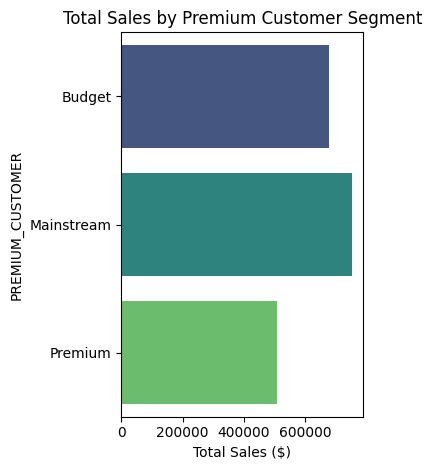

<Figure size 1200x600 with 0 Axes>

In [100]:
# Plot 2: Sales by Premium Customer Segment
plt.subplot(1, 2, 2)
sns.barplot(x='TOT_SALES', y='PREMIUM_CUSTOMER', data=premium_sales,
palette='viridis')
plt.title('Total Sales by Premium Customer Segment')
plt.xlabel('Total Sales ($)')
plt.tight_layout()
plt.figure(figsize=(12, 6))

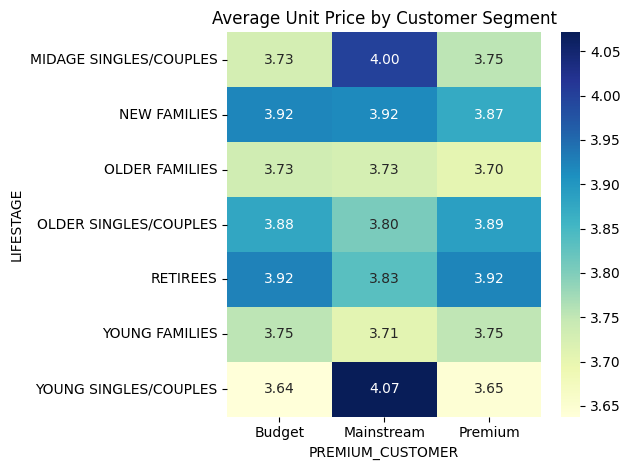

In [101]:
# Plot 3: Average Unit Price by Segment (Heatmap)
pivot_price = merged_data.pivot_table(values='UNIT_PRICE', index='LIFESTAGE',
columns='PREMIUM_CUSTOMER', aggfunc='mean')
sns.heatmap(pivot_price, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Average Unit Price by Customer Segment')
plt.tight_layout()
plt.show()

### Data Visialization

In [103]:
# Clean and standardize product names
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.strip()

In [105]:
# Extract package size and chip brand
transaction_data['PACKAGE_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+g)')
transaction_data['PACKAGE_SIZE_GRAMS'] = transaction_data['PACKAGE_SIZE'].str.replace('g', '').astype(float)
transaction_data['CHIP_BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

In [106]:
# Calculate unit price
transaction_data['UNIT_PRICE'] = transaction_data['TOT_SALES'] / transaction_data['PROD_QTY']

In [107]:
# Merge datasets
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR',how='left')

In [108]:
# Set a consistent color palette
colors = sns.color_palette('viridis', 10)
plt.style.use('seaborn-v0_8-whitegrid')

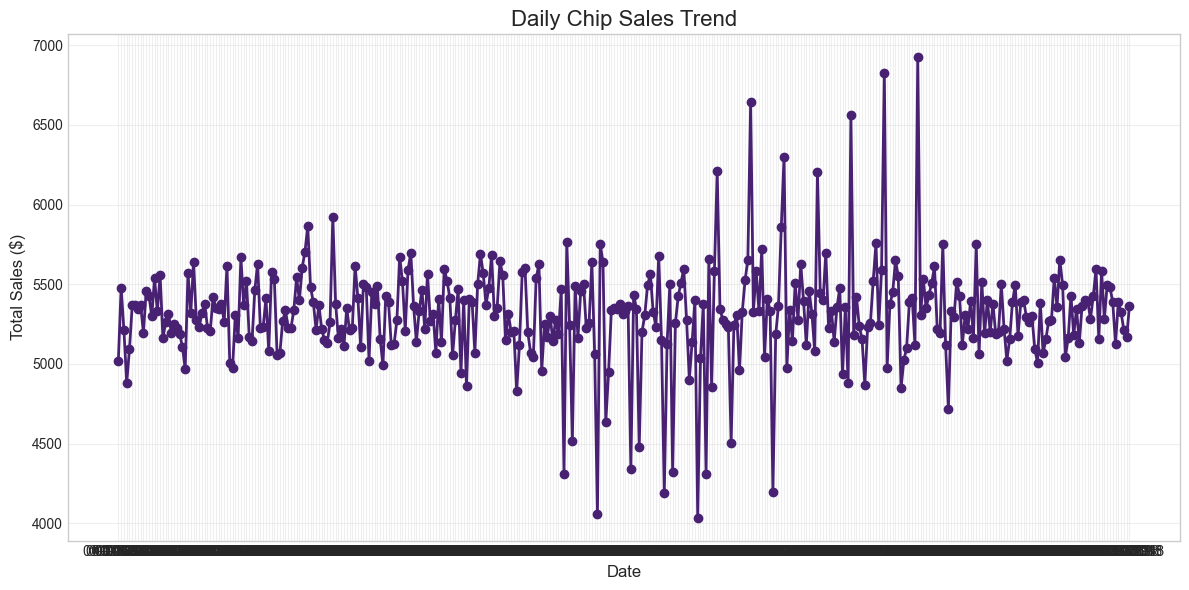

In [110]:
# Figure 1: Sales Trends Over Time
plt.figure(figsize=(12, 6))
sales_by_date = merged_data.groupby('DATE')['TOT_SALES'].sum().reset_index()
plt.plot(sales_by_date['DATE'], sales_by_date['TOT_SALES'], marker='o', color=colors[0],linewidth=2)
plt.title('Daily Chip Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sales_trend.png', dpi=300, bbox_inches='tight')

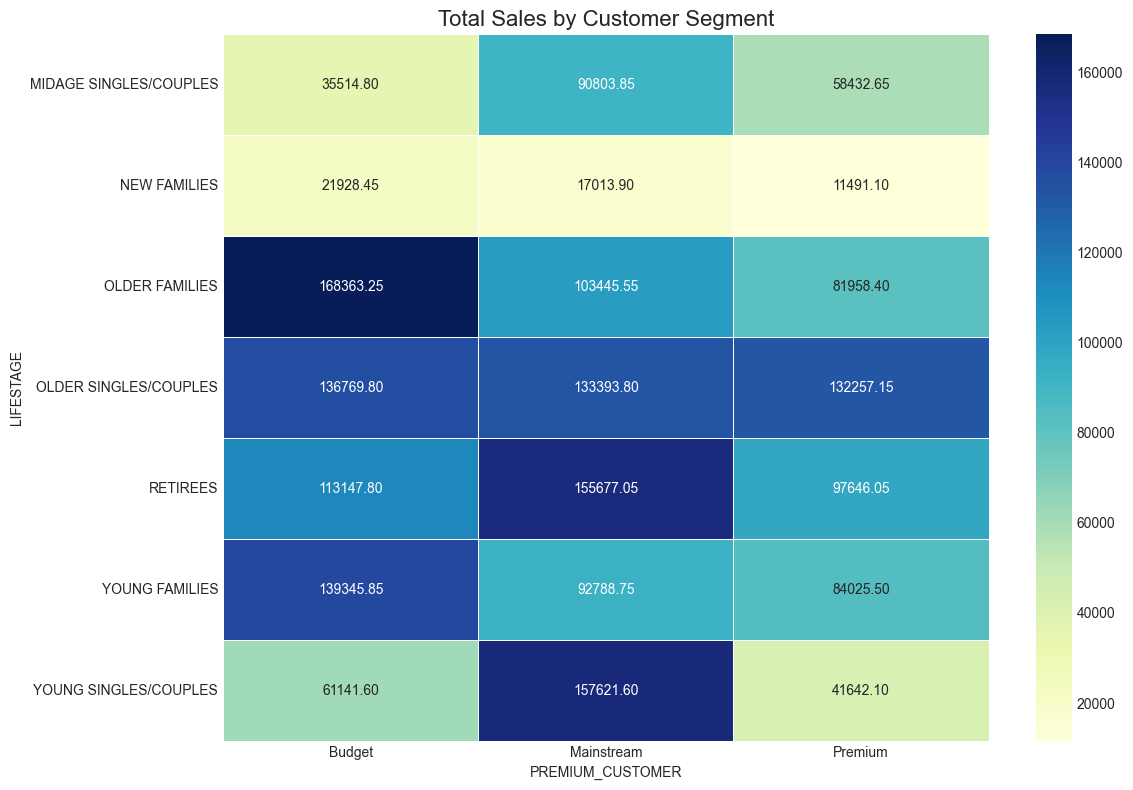

In [111]:
# Figure 2: Sales by Customer Segments (Heatmap)
plt.figure(figsize=(12, 8))
pivot_sales = merged_data.pivot_table(values='TOT_SALES', index='LIFESTAGE',
columns='PREMIUM_CUSTOMER', aggfunc='sum')
sns.heatmap(pivot_sales, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=.5)
plt.title('Total Sales by Customer Segment', fontsize=16)
plt.tight_layout()
plt.savefig('segment_sales_heatmap.png', dpi=300, bbox_inches='tight')

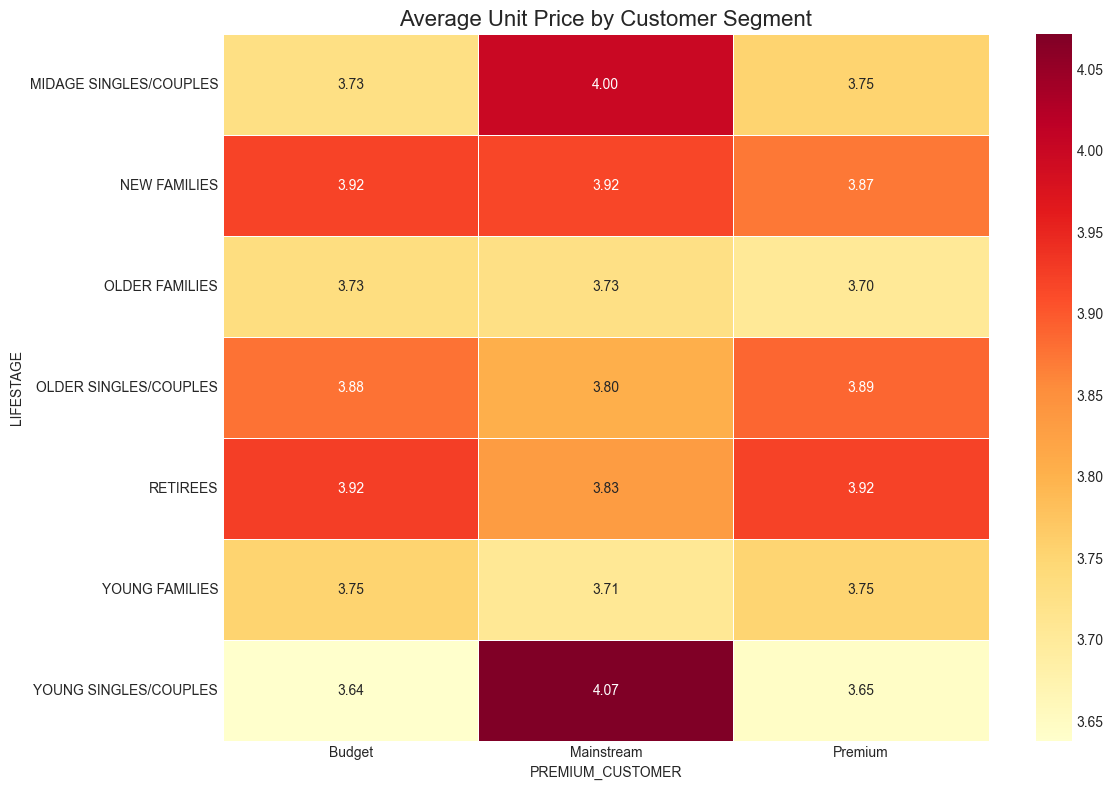

In [112]:
# Figure 3: Average Unit Price by Segment
plt.figure(figsize=(12, 8))
pivot_price = merged_data.pivot_table(values='UNIT_PRICE', index='LIFESTAGE',
columns='PREMIUM_CUSTOMER', aggfunc='mean')
sns.heatmap(pivot_price, annot=True, fmt='.2f', cmap='YlOrRd', linewidths=.5)
plt.title('Average Unit Price by Customer Segment', fontsize=16)
plt.tight_layout()
plt.savefig('segment_price_heatmap.png', dpi=300, bbox_inches='tight')

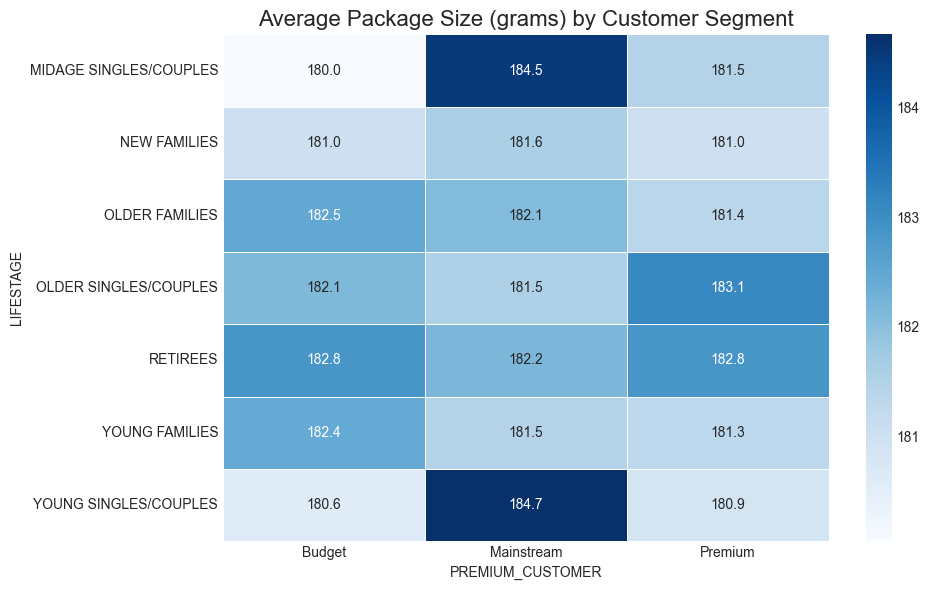

In [115]:
# Figure 4: Package Size Preference by Segment
plt.figure(figsize=(10, 6))
package_size_segment = merged_data.groupby(['LIFESTAGE',
'PREMIUM_CUSTOMER'])['PACKAGE_SIZE_GRAMS'].mean().reset_index()
package_size_pivot = package_size_segment.pivot(index='LIFESTAGE',
columns='PREMIUM_CUSTOMER', values='PACKAGE_SIZE_GRAMS')
sns.heatmap(package_size_pivot, annot=True, fmt='.1f', cmap='Blues', linewidths=.5)
plt.title('Average Package Size (grams) by Customer Segment', fontsize=16)
plt.tight_layout()
plt.savefig('package_size_heatmap.png', dpi=300, bbox_inches='tight')

In [118]:
# Figure 5: Brand Preference by Customer Segment (Top Brands)
plt.figure(figsize=(12, 8))
brand_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER','CHIP_BRAND'])['TOT_SALES'].sum().reset_index()
brand_lifestage = brand_segment.groupby(['LIFESTAGE','CHIP_BRAND'])['TOT_SALES'].sum().reset_index()
brand_premium = brand_segment.groupby(['PREMIUM_CUSTOMER','CHIP_BRAND'])['TOT_SALES'].sum().reset_index()

<Figure size 1200x800 with 0 Axes>

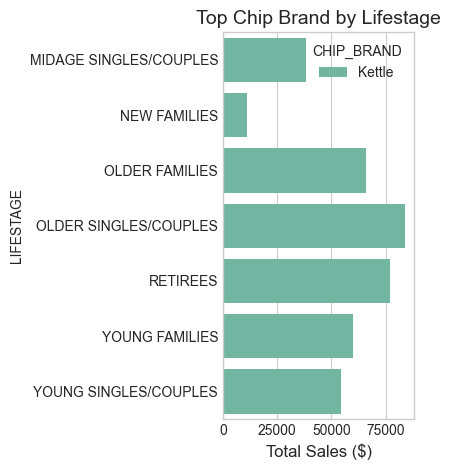

In [121]:
# Plot brand preference by lifestage
plt.subplot(1, 2, 1)
top_brands_lifestage = brand_lifestage.sort_values('TOT_SALES', ascending=False).drop_duplicates('LIFESTAGE')
sns.barplot(x='TOT_SALES', y='LIFESTAGE', hue='CHIP_BRAND',data=top_brands_lifestage, palette='Set2')
plt.title('Top Chip Brand by Lifestage', fontsize=14)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.tight_layout()

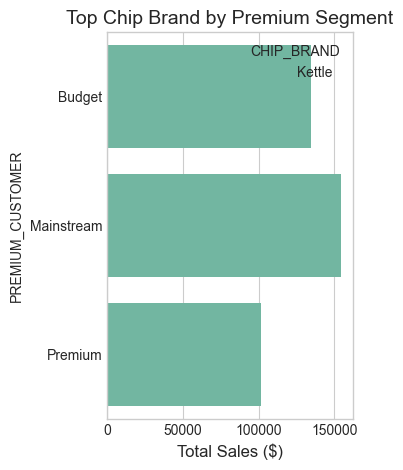

In [123]:
# Plot brand preference by premium customer segment
plt.subplot(1, 2, 2)
top_brands_premium = brand_premium.sort_values('TOT_SALES',
ascending=False).drop_duplicates('PREMIUM_CUSTOMER')
sns.barplot(x='TOT_SALES', y='PREMIUM_CUSTOMER', hue='CHIP_BRAND',
data=top_brands_premium, palette='Set2')
plt.title('Top Chip Brand by Premium Segment', fontsize=14)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.tight_layout()

In [124]:
plt.savefig('brand_preference.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [125]:
# Figure 6: Sales Contribution by Customer Segment
plt.figure(figsize=(12, 8))
segment_sales = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
total_sales = merged_data['TOT_SALES'].sum()
segment_sales['PERCENTAGE'] = segment_sales['TOT_SALES'] / total_sales * 100

<Figure size 1200x800 with 0 Axes>

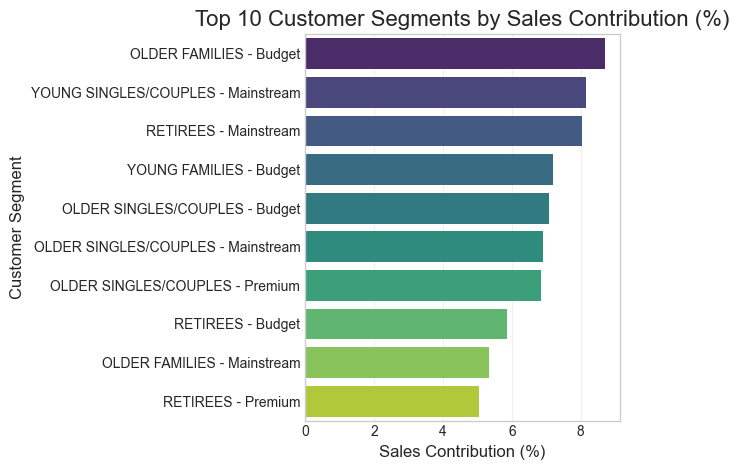

In [129]:
# Create a combined segment label
segment_sales['SEGMENT'] = segment_sales['LIFESTAGE'].astype(str) + ' - ' + segment_sales['PREMIUM_CUSTOMER'].astype(str)
top_segments = segment_sales.sort_values('PERCENTAGE', ascending=False).head(10)
sns.barplot(x='PERCENTAGE', y='SEGMENT', data=top_segments, palette=colors)
plt.title('Top 10 Customer Segments by Sales Contribution (%)', fontsize=16)
plt.xlabel('Sales Contribution (%)', fontsize=12)
plt.ylabel('Customer Segment', fontsize=12)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('segment_contribution.png', dpi=300, bbox_inches='tight')

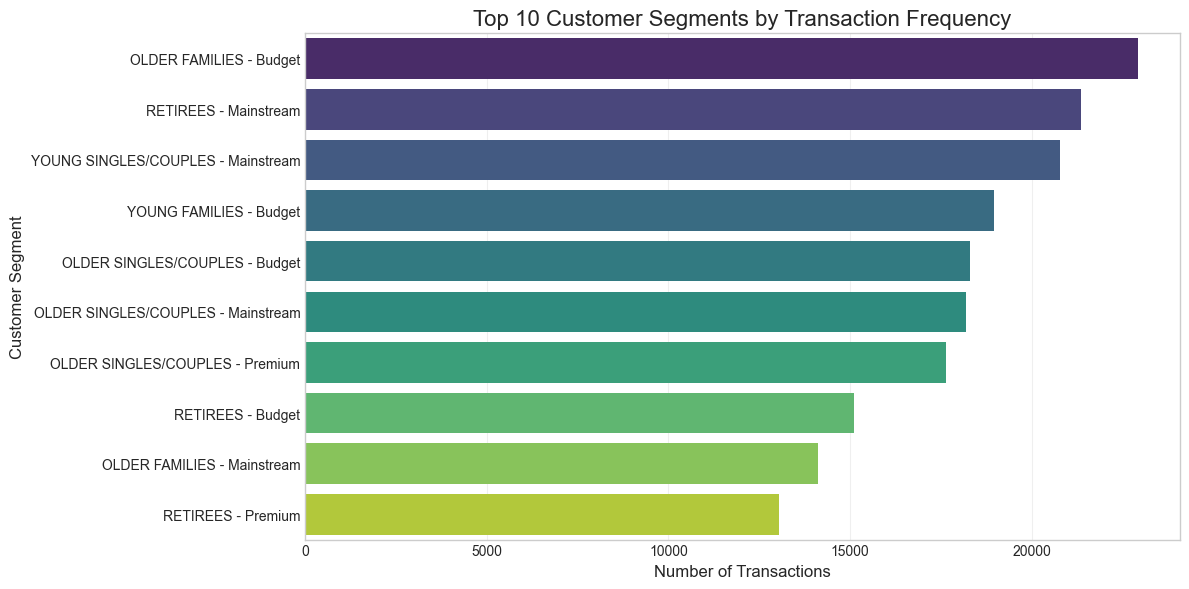

In [132]:
# Figure 7: Purchase Frequency Analysis
plt.figure(figsize=(12, 6))
txn_by_segment = merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TXN_ID'].nunique().reset_index()
txn_by_segment.rename(columns={'TXN_ID': 'TRANSACTION_COUNT'}, inplace=True)
txn_by_segment['SEGMENT'] = txn_by_segment['LIFESTAGE'].astype(str) + ' - ' + txn_by_segment['PREMIUM_CUSTOMER'].astype(str)
top_txn_segments = txn_by_segment.sort_values('TRANSACTION_COUNT', ascending=False).head(10)
sns.barplot(x='TRANSACTION_COUNT', y='SEGMENT', data=top_txn_segments, palette=colors)
plt.title('Top 10 Customer Segments by Transaction Frequency', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Customer Segment', fontsize=12)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('transaction_frequency.png', dpi=300, bbox_inches='tight')
plt.show()